#### Assignment : Email Spam detection and classification using KNN Algorithm and SVM Algorithm
* Name: Atul Naveen
* Class: BE-COMP(B)
* Roll: BCB13

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


#### 1. Data Preprocessing

In [5]:
df.shape

(5172, 3002)

In [7]:
df.size

15526344

In [9]:
df.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [12]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [13]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X=df.drop(["Email No.", "Prediction"],axis=1)

In [19]:
Y=df['Prediction']

In [21]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [23]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

##### Count of Spam and Not Spam emails using Countplot

<Axes: xlabel='Prediction', ylabel='count'>

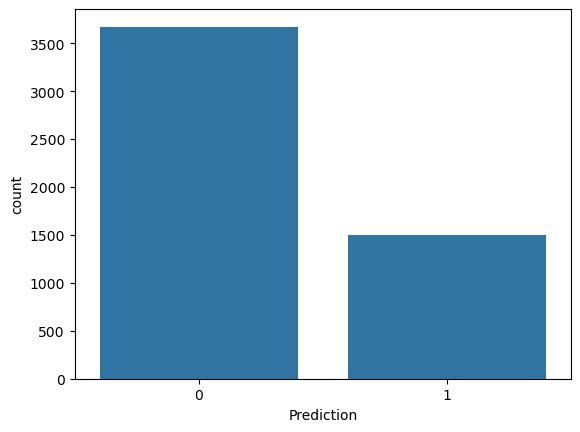

In [25]:
sns.countplot(x=Y)

In [27]:
Y.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64>

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_Scale=scaler.fit_transform(X)

In [31]:
X_Scale

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

##### Splitting the data into training and testing sets

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test=train_test_split(X_Scale,Y,test_size=0.46,random_state = 46)
X_train.shape

(2792, 3000)

In [35]:
X_Scale.shape

(5172, 3000)

In [37]:
X_test.shape

(2380, 3000)

In [39]:
Y_train.shape

(2792,)

#### 2. Applying the KNN algorithm 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [43]:
Y_pred=knn.predict(X_test)
Y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

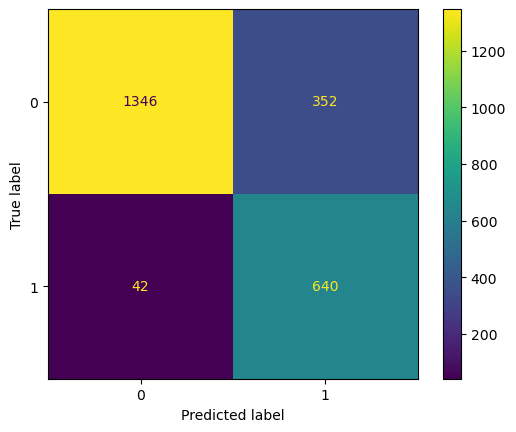

In [45]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_Test,Y_pred)

In [47]:
accuracy_score(Y_Test,Y_pred)

0.8344537815126051

In [49]:
print(classification_report(Y_Test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1698
           1       0.65      0.94      0.76       682

    accuracy                           0.83      2380
   macro avg       0.81      0.87      0.82      2380
weighted avg       0.88      0.83      0.84      2380



#### 3. Applying the SVM Algorithm 

In [51]:
from sklearn.svm import SVC

In [53]:
model=SVC(C=1)

In [55]:
model.fit(X_train,Y_train)

SVC(C=1)

In [57]:
y_pred_svc= model.predict(X_test)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

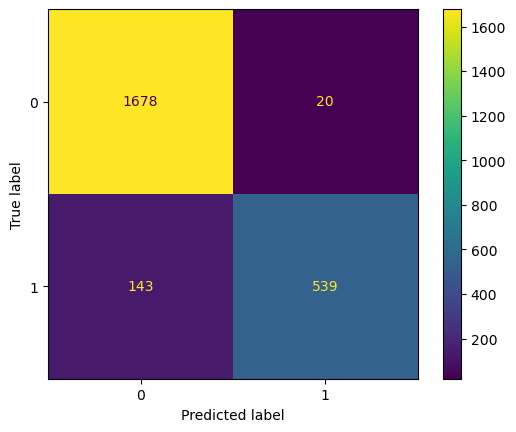

In [59]:
ConfusionMatrixDisplay.from_predictions(Y_Test,y_pred_svc)

In [61]:
accuracy_score(Y_Test,y_pred_svc)

0.9315126050420168

In [63]:
print(classification_report(Y_Test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1698
           1       0.96      0.79      0.87       682

    accuracy                           0.93      2380
   macro avg       0.94      0.89      0.91      2380
weighted avg       0.93      0.93      0.93      2380



#### CONCLUSIONS

* The KNN classification algorithm achieves the accuracy of 83%.
* The SVM classification algorithm achieves the accuracy of 93%.
* Therefore, we can conclude that the SVM Classification algorithm performs better than the KNN classification algorithm.